In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/03_Processed/02_ProcessedData.csv')

In [3]:
data.set_index('ID', inplace=True)

In [4]:
selected_columns = data.iloc[:,1:]

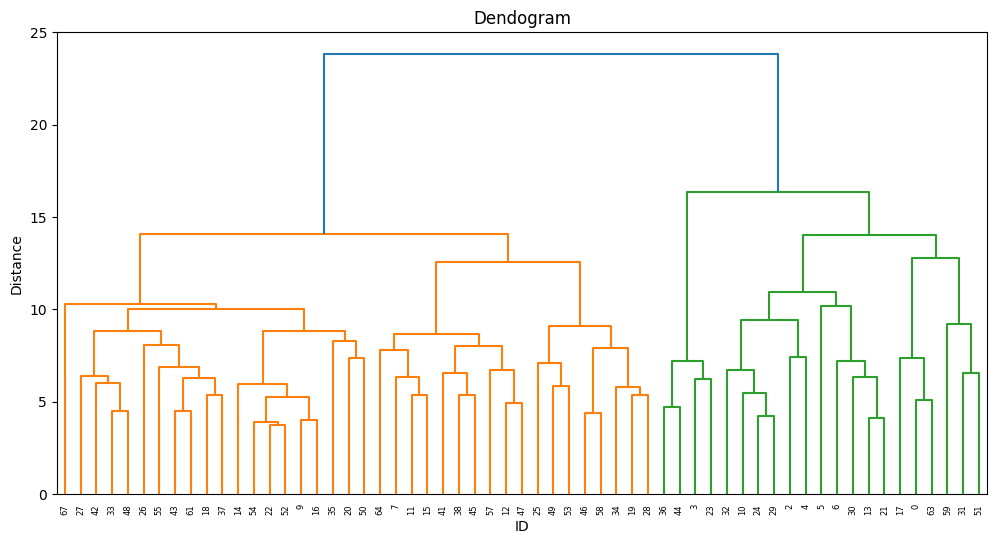

In [5]:
clustering = sch.linkage(selected_columns, method='ward')
plt.figure(figsize=(12,6))
sch.dendrogram(clustering, labels=selected_columns.index)
plt.xticks(rotation=90)
plt.title('Dendogram')
plt.xlabel('ID')
plt.ylabel('Distance')
plt.savefig('../figures/04_Dendrogram.png', dpi=300,bbox_inches='tight')
plt.show()

## Zmienna `numeric_data` ma zawierać wyłącznie kolumny z danymi numerycznymi z dataframe `data`. Brakujące wartości w danych numerycznych wypełniane są średnią wartością za pomocą metody `fillna`.
## Wykonana została standaryzacja danych przy użyciu `StandardScaler`. Metoda `fit_transform()` skaluje i dopasowuje dane numeryczne do standardowego rozkładu.
## Transpozycja danych tak, aby wiersze odpowiadały obserwacją, a kolumny zmiennym (np. umiejętnościom).
## Obliczona została macierz łączenia używając metody aglomeracyjnego łączenia hierarchicznego.

In [6]:
# numeric_data = selected_columns.select_dtypes(include=[np.number]).fillna(data.mean(numeric_only=True))
# numeric_data_scaled = StandardScaler().fit_transform(numeric_data)
# numeric_data_t_scaled = numeric_data_scaled.T
# linkage_matrix = sch.linkage(numeric_data_t_scaled, method='ward')